In [65]:
import numpy as np
import matplotlib.pyplot as plt
import GPy

def sinc(x, width=1, alpha=0.5):
    return np.sinc(x / width) #* np.exp(-alpha * x**2)

# Normalize datasets
def normalize(Y):
    Y_mean = Y.mean()
    Y_std = Y.std()
    return (Y - Y_mean) / Y_std

# Interpolating $Y1 = \sin(X)$

## With only Y2

### Correlating with $Y2 = \sin(X)$

In [66]:
# Generate mock datasets
np.random.seed(42)

# Dataset 1: Sine function with two peaks
X1 = np.linspace(0, 10, 100)[:, None]
Y1 = np.sin(X1) + 0.2 * np.random.randn(100, 1)


# Dataset 2: Double sinc function
X2 = np.linspace(0, 10, 100)[:, None]
Y2 = np.sin(X1) + 0.2 * np.random.randn(100, 1)

Y1 = normalize(Y1)
Y2 = normalize(Y2)

# Withhold the first peak of Dataset 1 for testing
lower = 0
upper = 7

X_train = X1[(X1 < lower) | (X1 > upper)].reshape(-1, 1)
Y_train = Y1[(X1 < lower) | (X1 > upper)].reshape(-1, 1)
X_test = X1[(X1 >= lower) & (X1 <= upper)].reshape(-1, 1)
Y_test = Y1[(X1 >= lower) & (X1 <= upper)].reshape(-1, 1)

# Define kernels
K1 = GPy.kern.Bias(1)  # Bias kernel
K2 = GPy.kern.RBF(1)   # RBF kernel
K3 = GPy.kern.White(1)   # RBF kernel
K4 = GPy.kern.Matern52(1)

X_list = [X_train, X2]
Y_list = [Y_train, Y2]
K_list = [K2]
num_outputs = len(X_list)

# LCM kernel with three outputs
lcm = GPy.util.multioutput.LCM(input_dim=1, num_outputs=num_outputs, kernels_list=K_list)

# Create the GP coregionalized regression model
model = GPy.models.GPCoregionalizedRegression(X_list=X_list, Y_list=Y_list, kernel=lcm)

# Constraints
# model['ICM0.B.kappa'].constrain_fixed(0)
# model['ICM0.B.W'][1].constrain_fixed(0)

# Optimize the model
model.optimize()

index,gp.ICM0.B.W,constraints,priors
[0 0],15.62059282,,
[1 0],15.61848419,,


index,gp.ICM0.B.kappa,constraints,priors
[0],0.00000009,+ve,
[1],0.00000038,+ve,


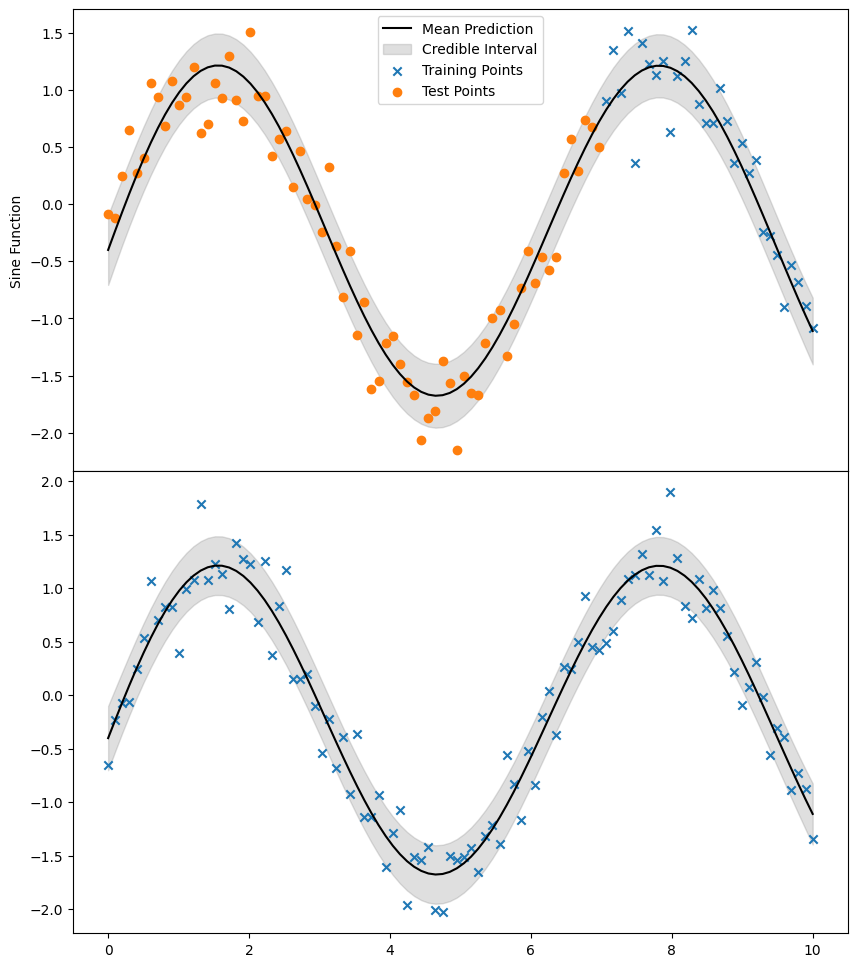

In [67]:
# Display model parameters
display(model['ICM0.B.W'], model['ICM0.B.kappa'])

fig = plt.figure(figsize=(10, 12))
gs = fig.add_gridspec(num_outputs, hspace=0)
axs = gs.subplots(sharex=True)

for i, X, Y in zip(range(num_outputs), X_list, Y_list):
    X_test_with_index = np.hstack((X1, (i * np.ones_like(X1)).reshape(-1,1)))
    Y_metadata = {'output_index': X_test_with_index[:, 1:].astype(int)}
    preds = model.predict(X_test_with_index, Y_metadata=Y_metadata)
    lower, upper = model.predict_quantiles(X=X_test_with_index, Y_metadata=Y_metadata, quantiles=(16, 84))
    lower, upper = lower.flatten(), upper.flatten()    

    if i == 0:
        axs[i].plot(X1, preds[0].flatten(), color='black', label='Mean Prediction')
        axs[i].fill_between(X1.flatten(), lower, upper, alpha=0.25, color='grey', label='Credible Interval')
        axs[i].scatter(X_train, Y_train, marker='x', label='Training Points')
        axs[i].scatter(X_test, Y_test, label='Test Points')
        axs[i].set_ylabel('Sine Function')
        axs[i].legend(loc='upper center')
    else:
        axs[i].plot(X, preds[0].flatten(), color='black')
        axs[i].fill_between(X.flatten(), lower, upper, alpha=0.25, color='grey')
        axs[i].scatter(X, Y, marker='x',)

plt.show()


### Correlating with $Y2 = \sin(X + \pi/8)$

In [68]:
# Generate mock datasets
np.random.seed(42)

# Dataset 1: Sine function with two peaks
X1 = np.linspace(0, 10, 100)[:, None]
Y1 = np.sin(X1) + 0.2 * np.random.randn(100, 1)


# Dataset 2: Double sinc function
X2 = np.linspace(0, 10, 100)[:, None]
Y2 = np.sin(X1 + np.pi/8) + 0.2 * np.random.randn(100, 1)

Y1 = normalize(Y1)
Y2 = normalize(Y2)

# Withhold the first peak of Dataset 1 for testing
lower = 0
upper = 7

X_train = X1[(X1 < lower) | (X1 > upper)].reshape(-1, 1)
Y_train = Y1[(X1 < lower) | (X1 > upper)].reshape(-1, 1)
X_test = X1[(X1 >= lower) & (X1 <= upper)].reshape(-1, 1)
Y_test = Y1[(X1 >= lower) & (X1 <= upper)].reshape(-1, 1)

# Define kernels
K1 = GPy.kern.Bias(1)  # Bias kernel
K2 = GPy.kern.RBF(1)   # RBF kernel
K3 = GPy.kern.White(1)   # RBF kernel
K4 = GPy.kern.Matern52(1)

X_list = [X_train, X2]
Y_list = [Y_train, Y2]
K_list = [K2]
num_outputs = len(X_list)

# LCM kernel with three outputs
lcm = GPy.util.multioutput.LCM(input_dim=1, num_outputs=num_outputs, kernels_list=K_list)

# Create the GP coregionalized regression model
model = GPy.models.GPCoregionalizedRegression(X_list=X_list, Y_list=Y_list, kernel=lcm)

# Constraints
# model['ICM0.B.kappa'].constrain_fixed(0)
# model['ICM0.B.W'][1].constrain_fixed(0)

# Optimize the model
model.optimize()

index,gp.ICM0.B.W,constraints,priors
[0 0],2.33189761,,
[1 0],2.64422576,,


index,gp.ICM0.B.kappa,constraints,priors
[0],0.13042182,+ve,
[1],0.15939789,+ve,


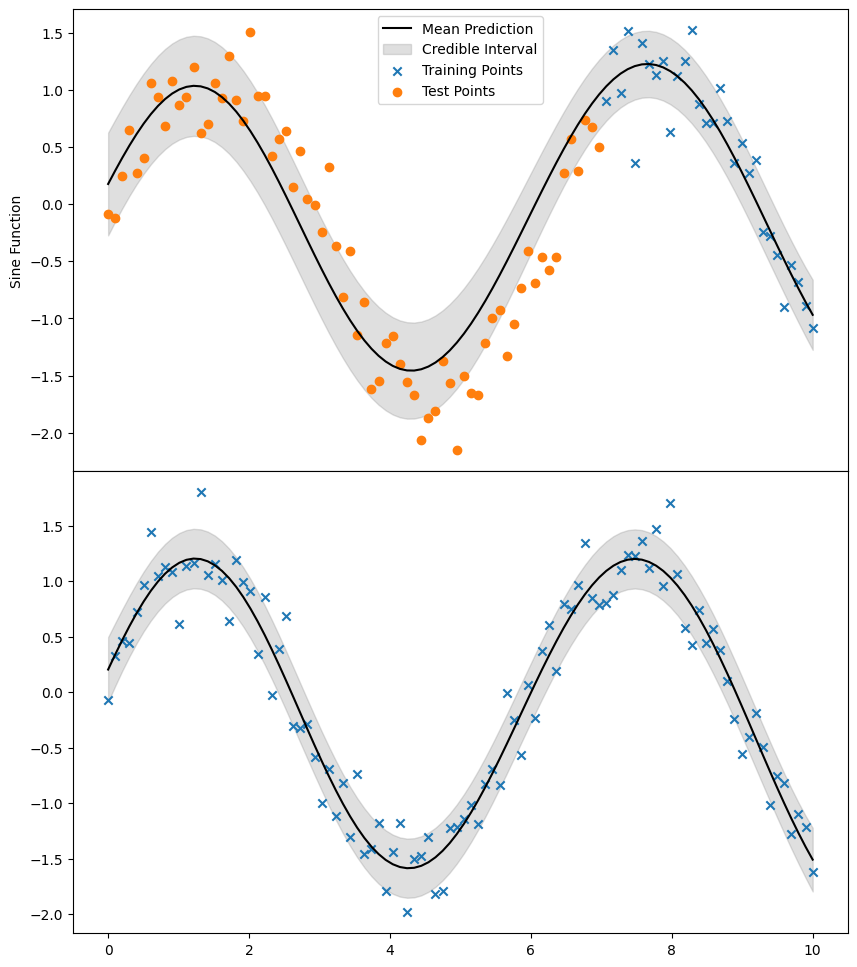

In [69]:
# Display model parameters
display(model['ICM0.B.W'], model['ICM0.B.kappa'])

fig = plt.figure(figsize=(10, 12))
gs = fig.add_gridspec(num_outputs, hspace=0)
axs = gs.subplots(sharex=True)

for i, X, Y in zip(range(num_outputs), X_list, Y_list):
    X_test_with_index = np.hstack((X1, (i * np.ones_like(X1)).reshape(-1,1)))
    Y_metadata = {'output_index': X_test_with_index[:, 1:].astype(int)}
    preds = model.predict(X_test_with_index, Y_metadata=Y_metadata)
    lower, upper = model.predict_quantiles(X=X_test_with_index, Y_metadata=Y_metadata, quantiles=(16, 84))
    lower, upper = lower.flatten(), upper.flatten()    

    if i == 0:
        axs[i].plot(X1, preds[0].flatten(), color='black', label='Mean Prediction')
        axs[i].fill_between(X1.flatten(), lower, upper, alpha=0.25, color='grey', label='Credible Interval')
        axs[i].scatter(X_train, Y_train, marker='x', label='Training Points')
        axs[i].scatter(X_test, Y_test, label='Test Points')
        axs[i].set_ylabel('Sine Function')
        axs[i].legend(loc='upper center')
    else:
        axs[i].plot(X, preds[0].flatten(), color='black')
        axs[i].fill_between(X.flatten(), lower, upper, alpha=0.25, color='grey')
        axs[i].scatter(X, Y, marker='x',)

plt.show()


### Correlating with $Y2 = \sin(X + \pi/4)$

In [70]:
# Generate mock datasets
np.random.seed(42)

# Dataset 1: Sine function with two peaks
X1 = np.linspace(0, 10, 100)[:, None]
Y1 = np.sin(X1) + 0.2 * np.random.randn(100, 1)


# Dataset 2: Double sinc function
X2 = np.linspace(0, 10, 100)[:, None]
Y2 = np.sin(X1 + np.pi/4) + 0.2 * np.random.randn(100, 1)

Y1 = normalize(Y1)
Y2 = normalize(Y2)

# Withhold the first peak of Dataset 1 for testing
lower = 0
upper = 7

X_train = X1[(X1 < lower) | (X1 > upper)].reshape(-1, 1)
Y_train = Y1[(X1 < lower) | (X1 > upper)].reshape(-1, 1)
X_test = X1[(X1 >= lower) & (X1 <= upper)].reshape(-1, 1)
Y_test = Y1[(X1 >= lower) & (X1 <= upper)].reshape(-1, 1)

# Define kernels
K1 = GPy.kern.Bias(1)  # Bias kernel
K2 = GPy.kern.RBF(1)   # RBF kernel
K3 = GPy.kern.White(1)   # RBF kernel
K4 = GPy.kern.Matern52(1)

X_list = [X_train, X2]
Y_list = [Y_train, Y2]
K_list = [K2]
num_outputs = len(X_list)

# LCM kernel with three outputs
lcm = GPy.util.multioutput.LCM(input_dim=1, num_outputs=num_outputs, kernels_list=K_list)

# Create the GP coregionalized regression model
model = GPy.models.GPCoregionalizedRegression(X_list=X_list, Y_list=Y_list, kernel=lcm)

# Constraints
# model['ICM0.B.kappa'].constrain_fixed(0)
# model['ICM0.B.W'][1].constrain_fixed(0)

# Optimize the model
model.optimize()

index,gp.ICM0.B.W,constraints,priors
[0 0],1.11769845,,
[1 0],1.09658050,,


index,gp.ICM0.B.kappa,constraints,priors
[0],0.42142753,+ve,
[1],0.41860248,+ve,


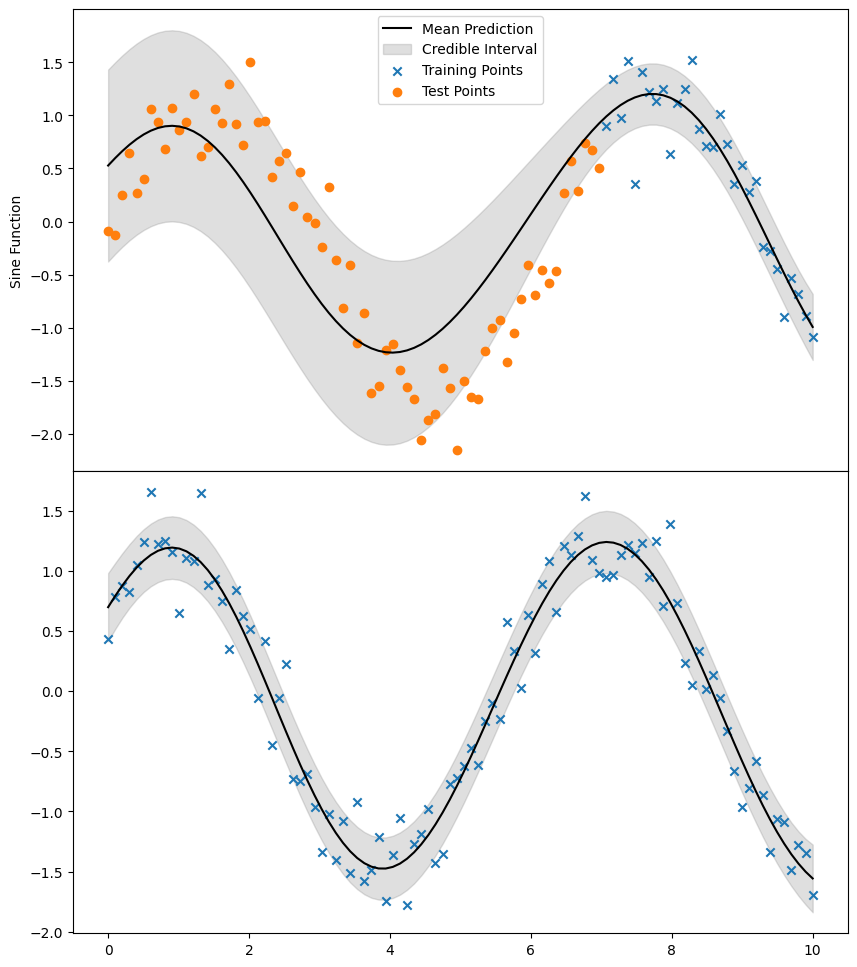

In [71]:
# Display model parameters
display(model['ICM0.B.W'], model['ICM0.B.kappa'])

fig = plt.figure(figsize=(10, 12))
gs = fig.add_gridspec(num_outputs, hspace=0)
axs = gs.subplots(sharex=True)

for i, X, Y in zip(range(num_outputs), X_list, Y_list):
    X_test_with_index = np.hstack((X1, (i * np.ones_like(X1)).reshape(-1,1)))
    Y_metadata = {'output_index': X_test_with_index[:, 1:].astype(int)}
    preds = model.predict(X_test_with_index, Y_metadata=Y_metadata)
    lower, upper = model.predict_quantiles(X=X_test_with_index, Y_metadata=Y_metadata, quantiles=(16, 84))
    lower, upper = lower.flatten(), upper.flatten()    

    if i == 0:
        axs[i].plot(X1, preds[0].flatten(), color='black', label='Mean Prediction')
        axs[i].fill_between(X1.flatten(), lower, upper, alpha=0.25, color='grey', label='Credible Interval')
        axs[i].scatter(X_train, Y_train, marker='x', label='Training Points')
        axs[i].scatter(X_test, Y_test, label='Test Points')
        axs[i].set_ylabel('Sine Function')
        axs[i].legend(loc='upper center')
    else:
        axs[i].plot(X, preds[0].flatten(), color='black')
        axs[i].fill_between(X.flatten(), lower, upper, alpha=0.25, color='grey')
        axs[i].scatter(X, Y, marker='x',)

plt.show()


### Correlating with $Y2 = \sin(X + \pi/2)$

In [72]:
# Generate mock datasets
np.random.seed(42)

# Dataset 1: Sine function with two peaks
X1 = np.linspace(0, 10, 100)[:, None]
Y1 = np.sin(X1) + 0.2 * np.random.randn(100, 1)


# Dataset 2: Double sinc function
X2 = np.linspace(0, 10, 100)[:, None]
Y2 = np.sin(X1 + np.pi/2) + 0.2 * np.random.randn(100, 1)

Y1 = normalize(Y1)
Y2 = normalize(Y2)

# Withhold the first peak of Dataset 1 for testing
lower = 0
upper = 7

X_train = X1[(X1 < lower) | (X1 > upper)].reshape(-1, 1)
Y_train = Y1[(X1 < lower) | (X1 > upper)].reshape(-1, 1)
X_test = X1[(X1 >= lower) & (X1 <= upper)].reshape(-1, 1)
Y_test = Y1[(X1 >= lower) & (X1 <= upper)].reshape(-1, 1)

# Define kernels
K1 = GPy.kern.Bias(1)  # Bias kernel
K2 = GPy.kern.RBF(1)   # RBF kernel
K3 = GPy.kern.White(1)   # RBF kernel
K4 = GPy.kern.Matern52(1)

X_list = [X_train, X2]
Y_list = [Y_train, Y2]
K_list = [K2]
num_outputs = len(X_list)

# LCM kernel with three outputs
lcm = GPy.util.multioutput.LCM(input_dim=1, num_outputs=num_outputs, kernels_list=K_list)

# Create the GP coregionalized regression model
model = GPy.models.GPCoregionalizedRegression(X_list=X_list, Y_list=Y_list, kernel=lcm)

# Constraints
# model['ICM0.B.kappa'].constrain_fixed(0)
# model['ICM0.B.W'][1].constrain_fixed(0)

# Optimize the model
model.optimize()

index,gp.ICM0.B.W,constraints,priors
[0 0],0.53432250,,
[1 0],-0.00555041,,


index,gp.ICM0.B.kappa,constraints,priors
[0],0.85571840,+ve,
[1],0.83844900,+ve,


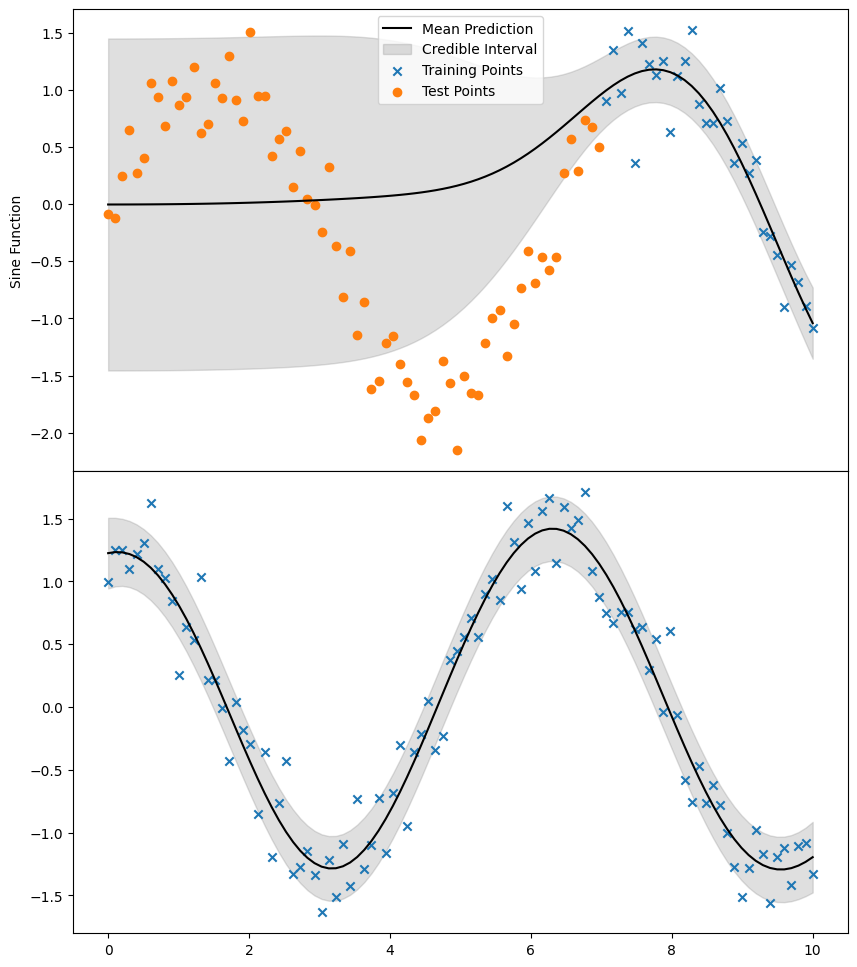

In [73]:
# Display model parameters
display(model['ICM0.B.W'], model['ICM0.B.kappa'])

fig = plt.figure(figsize=(10, 12))
gs = fig.add_gridspec(num_outputs, hspace=0)
axs = gs.subplots(sharex=True)

for i, X, Y in zip(range(num_outputs), X_list, Y_list):
    X_test_with_index = np.hstack((X1, (i * np.ones_like(X1)).reshape(-1,1)))
    Y_metadata = {'output_index': X_test_with_index[:, 1:].astype(int)}
    preds = model.predict(X_test_with_index, Y_metadata=Y_metadata)
    lower, upper = model.predict_quantiles(X=X_test_with_index, Y_metadata=Y_metadata, quantiles=(16, 84))
    lower, upper = lower.flatten(), upper.flatten()    

    if i == 0:
        axs[i].plot(X1, preds[0].flatten(), color='black', label='Mean Prediction')
        axs[i].fill_between(X1.flatten(), lower, upper, alpha=0.25, color='grey', label='Credible Interval')
        axs[i].scatter(X_train, Y_train, marker='x', label='Training Points')
        axs[i].scatter(X_test, Y_test, label='Test Points')
        axs[i].set_ylabel('Sine Function')
        axs[i].legend(loc='upper center')
    else:
        axs[i].plot(X, preds[0].flatten(), color='black')
        axs[i].fill_between(X.flatten(), lower, upper, alpha=0.25, color='grey')
        axs[i].scatter(X, Y, marker='x',)

plt.show()


### Correlating with $Y2 = \sin(X + \pi)$

In [74]:
# Generate mock datasets
np.random.seed(42)

# Dataset 1: Sine function with two peaks
X1 = np.linspace(0, 10, 100)[:, None]
Y1 = np.sin(X1) + 0.2 * np.random.randn(100, 1)


# Dataset 2: Double sinc function
X2 = np.linspace(0, 10, 100)[:, None]
Y2 = np.sin(X1 + np.pi) + 0.2 * np.random.randn(100, 1)

Y1 = normalize(Y1)
Y2 = normalize(Y2)

# Withhold the first peak of Dataset 1 for testing
lower = 0
upper = 7

X_train = X1[(X1 < lower) | (X1 > upper)].reshape(-1, 1)
Y_train = Y1[(X1 < lower) | (X1 > upper)].reshape(-1, 1)
X_test = X1[(X1 >= lower) & (X1 <= upper)].reshape(-1, 1)
Y_test = Y1[(X1 >= lower) & (X1 <= upper)].reshape(-1, 1)

# Define kernels
K1 = GPy.kern.Bias(1)  # Bias kernel
K2 = GPy.kern.RBF(1)   # RBF kernel
K3 = GPy.kern.White(1)   # RBF kernel
K4 = GPy.kern.Matern52(1)

X_list = [X_train, X2]
Y_list = [Y_train, Y2]
K_list = [K2]
num_outputs = len(X_list)

# LCM kernel with three outputs
lcm = GPy.util.multioutput.LCM(input_dim=1, num_outputs=num_outputs, kernels_list=K_list)

# Create the GP coregionalized regression model
model = GPy.models.GPCoregionalizedRegression(X_list=X_list, Y_list=Y_list, kernel=lcm)

# Constraints
# model['ICM0.B.kappa'].constrain_fixed(0)
# model['ICM0.B.W'][1].constrain_fixed(0)

# Optimize the model
model.optimize()

index,gp.ICM0.B.W,constraints,priors
[0 0],-15.41813494,,
[1 0],14.44333114,,


index,gp.ICM0.B.kappa,constraints,priors
[0],0.00000096,+ve,
[1],0.00000046,+ve,


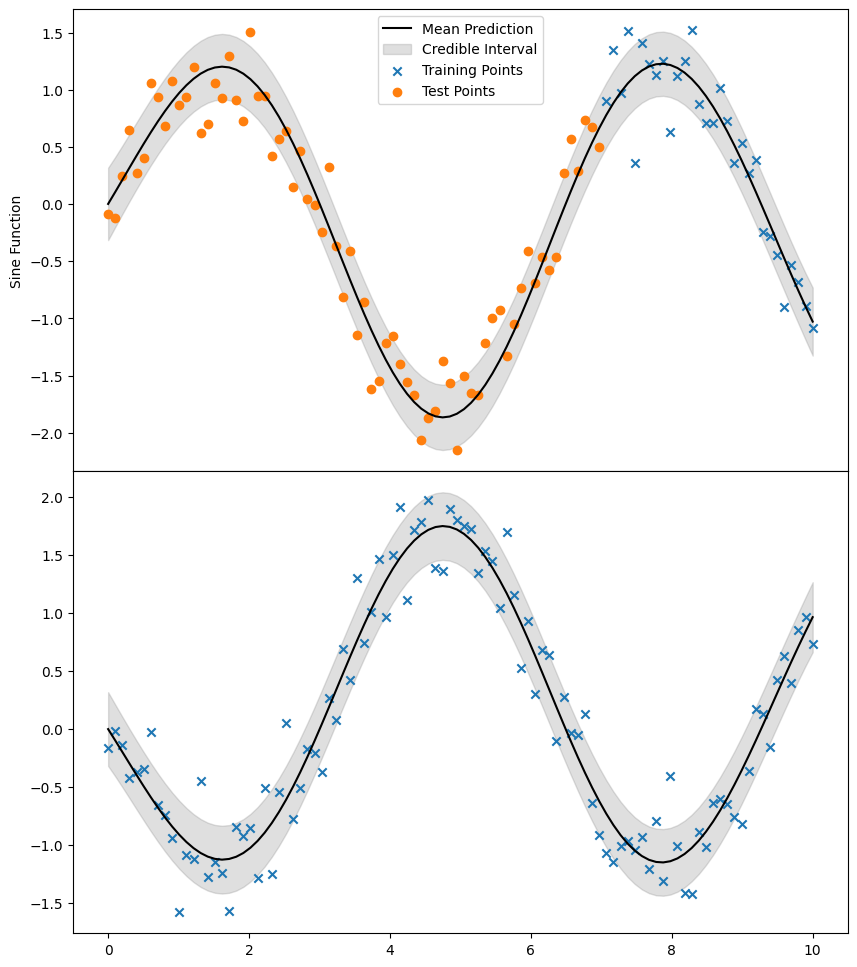

In [75]:
# Display model parameters
display(model['ICM0.B.W'], model['ICM0.B.kappa'])

fig = plt.figure(figsize=(10, 12))
gs = fig.add_gridspec(num_outputs, hspace=0)
axs = gs.subplots(sharex=True)

for i, X, Y in zip(range(num_outputs), X_list, Y_list):
    X_test_with_index = np.hstack((X1, (i * np.ones_like(X1)).reshape(-1,1)))
    Y_metadata = {'output_index': X_test_with_index[:, 1:].astype(int)}
    preds = model.predict(X_test_with_index, Y_metadata=Y_metadata)
    lower, upper = model.predict_quantiles(X=X_test_with_index, Y_metadata=Y_metadata, quantiles=(16, 84))
    lower, upper = lower.flatten(), upper.flatten()    

    if i == 0:
        axs[i].plot(X1, preds[0].flatten(), color='black', label='Mean Prediction')
        axs[i].fill_between(X1.flatten(), lower, upper, alpha=0.25, color='grey', label='Credible Interval')
        axs[i].scatter(X_train, Y_train, marker='x', label='Training Points')
        axs[i].scatter(X_test, Y_test, label='Test Points')
        axs[i].set_ylabel('Sine Function')
        axs[i].legend(loc='upper center')
    else:
        axs[i].plot(X, preds[0].flatten(), color='black')
        axs[i].fill_between(X.flatten(), lower, upper, alpha=0.25, color='grey')
        axs[i].scatter(X, Y, marker='x',)

plt.show()


### Correlating with $Y2 = \sin(X + \pi + \pi/2)$

In [76]:
# Generate mock datasets
np.random.seed(42)

# Dataset 1: Sine function with two peaks
X1 = np.linspace(0, 10, 100)[:, None]
Y1 = np.sin(X1) + 0.2 * np.random.randn(100, 1)


# Dataset 2: Double sinc function
X2 = np.linspace(0, 10, 100)[:, None]
Y2 = np.sin(X1 + np.pi + np.pi/2) + 0.2 * np.random.randn(100, 1)

Y1 = normalize(Y1)
Y2 = normalize(Y2)

# Withhold the first peak of Dataset 1 for testing
lower = 0
upper = 7

X_train = X1[(X1 < lower) | (X1 > upper)].reshape(-1, 1)
Y_train = Y1[(X1 < lower) | (X1 > upper)].reshape(-1, 1)
X_test = X1[(X1 >= lower) & (X1 <= upper)].reshape(-1, 1)
Y_test = Y1[(X1 >= lower) & (X1 <= upper)].reshape(-1, 1)

# Define kernels
K1 = GPy.kern.Bias(1)  # Bias kernel
K2 = GPy.kern.RBF(1)   # RBF kernel
K3 = GPy.kern.White(1)   # RBF kernel
K4 = GPy.kern.Matern52(1)

X_list = [X_train, X2]
Y_list = [Y_train, Y2]
K_list = [K2]
num_outputs = len(X_list)

# LCM kernel with three outputs
lcm = GPy.util.multioutput.LCM(input_dim=1, num_outputs=num_outputs, kernels_list=K_list)

# Create the GP coregionalized regression model
model = GPy.models.GPCoregionalizedRegression(X_list=X_list, Y_list=Y_list, kernel=lcm)

# Constraints
# model['ICM0.B.kappa'].constrain_fixed(0)
# model['ICM0.B.W'][1].constrain_fixed(0)

# Optimize the model
model.optimize()

index,gp.ICM0.B.W,constraints,priors
[0 0],0.47275667,,
[1 0],0.69073617,,


index,gp.ICM0.B.kappa,constraints,priors
[0],1.24814205,+ve,
[1],0.61042429,+ve,


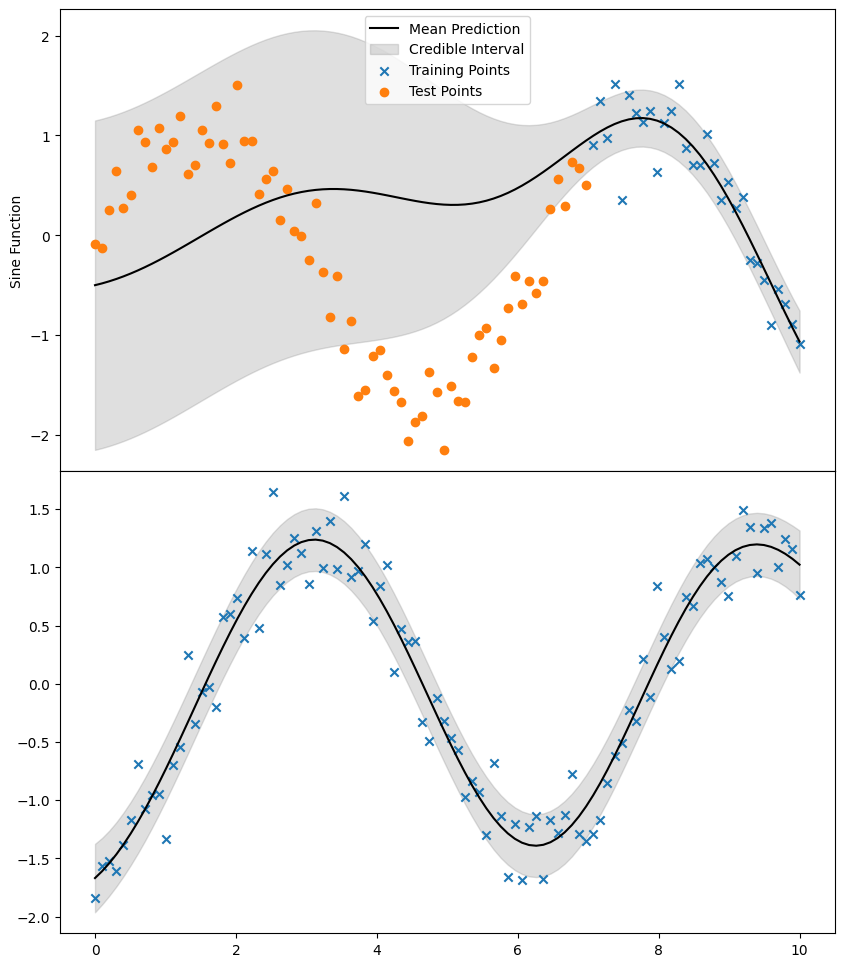

In [77]:
# Display model parameters
display(model['ICM0.B.W'], model['ICM0.B.kappa'])

fig = plt.figure(figsize=(10, 12))
gs = fig.add_gridspec(num_outputs, hspace=0)
axs = gs.subplots(sharex=True)

for i, X, Y in zip(range(num_outputs), X_list, Y_list):
    X_test_with_index = np.hstack((X1, (i * np.ones_like(X1)).reshape(-1,1)))
    Y_metadata = {'output_index': X_test_with_index[:, 1:].astype(int)}
    preds = model.predict(X_test_with_index, Y_metadata=Y_metadata)
    lower, upper = model.predict_quantiles(X=X_test_with_index, Y_metadata=Y_metadata, quantiles=(16, 84))
    lower, upper = lower.flatten(), upper.flatten()    

    if i == 0:
        axs[i].plot(X1, preds[0].flatten(), color='black', label='Mean Prediction')
        axs[i].fill_between(X1.flatten(), lower, upper, alpha=0.25, color='grey', label='Credible Interval')
        axs[i].scatter(X_train, Y_train, marker='x', label='Training Points')
        axs[i].scatter(X_test, Y_test, label='Test Points')
        axs[i].set_ylabel('Sine Function')
        axs[i].legend(loc='upper center')
    else:
        axs[i].plot(X, preds[0].flatten(), color='black')
        axs[i].fill_between(X.flatten(), lower, upper, alpha=0.25, color='grey')
        axs[i].scatter(X, Y, marker='x',)

plt.show()


### Correlating with $Y2 = \sin(X + \pi + \pi/4)$

In [78]:
# Generate mock datasets
np.random.seed(42)

# Dataset 1: Sine function with two peaks
X1 = np.linspace(0, 10, 100)[:, None]
Y1 = np.sin(X1) + 0.2 * np.random.randn(100, 1)


# Dataset 2: Double sinc function
X2 = np.linspace(0, 10, 100)[:, None]
Y2 = np.sin(X1 + np.pi + np.pi/4) + 0.2 * np.random.randn(100, 1)

Y1 = normalize(Y1)
Y2 = normalize(Y2)

# Withhold the first peak of Dataset 1 for testing
lower = 0
upper = 7

X_train = X1[(X1 < lower) | (X1 > upper)].reshape(-1, 1)
Y_train = Y1[(X1 < lower) | (X1 > upper)].reshape(-1, 1)
X_test = X1[(X1 >= lower) & (X1 <= upper)].reshape(-1, 1)
Y_test = Y1[(X1 >= lower) & (X1 <= upper)].reshape(-1, 1)

# Define kernels
K1 = GPy.kern.Bias(1)  # Bias kernel
K2 = GPy.kern.RBF(1)   # RBF kernel
K3 = GPy.kern.White(1)   # RBF kernel
K4 = GPy.kern.Matern52(1)

X_list = [X_train, X2]
Y_list = [Y_train, Y2]
K_list = [K2]
num_outputs = len(X_list)

# LCM kernel with three outputs
lcm = GPy.util.multioutput.LCM(input_dim=1, num_outputs=num_outputs, kernels_list=K_list)

# Create the GP coregionalized regression model
model = GPy.models.GPCoregionalizedRegression(X_list=X_list, Y_list=Y_list, kernel=lcm)

# Constraints
# model['ICM0.B.kappa'].constrain_fixed(0)
# model['ICM0.B.W'][1].constrain_fixed(0)

# Optimize the model
model.optimize()

index,gp.ICM0.B.W,constraints,priors
[0 0],-1.12033162,,
[1 0],0.98363015,,


index,gp.ICM0.B.kappa,constraints,priors
[0],0.50440522,+ve,
[1],0.44120068,+ve,


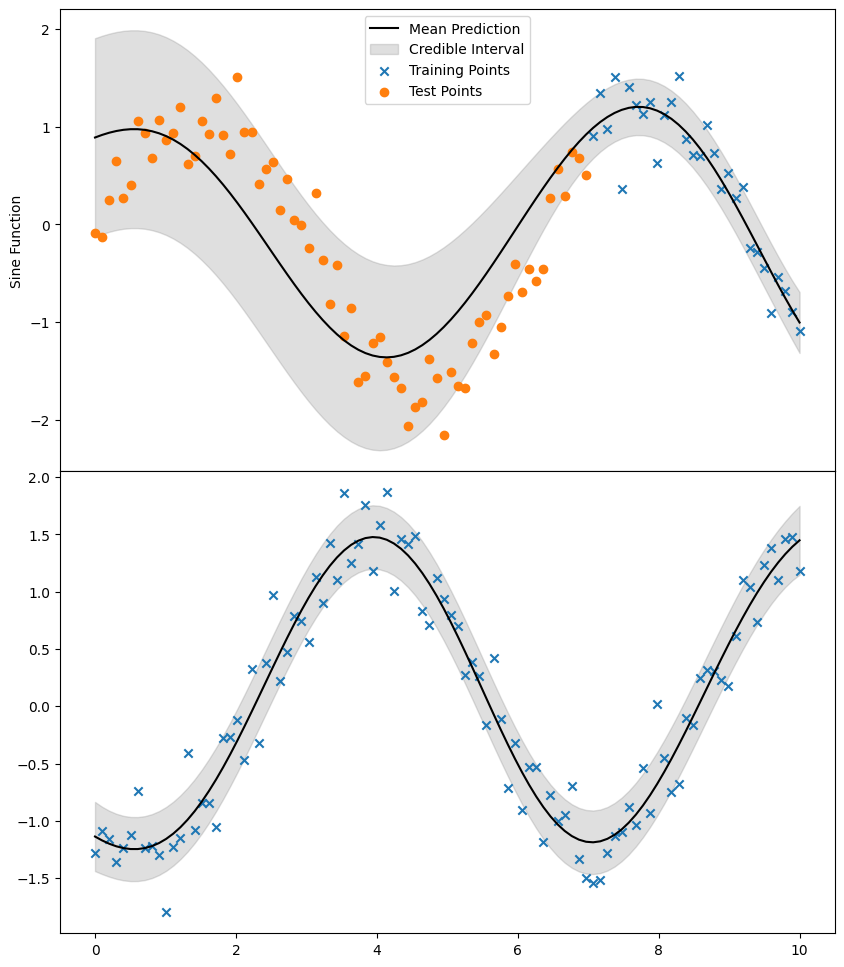

In [79]:
# Display model parameters
display(model['ICM0.B.W'], model['ICM0.B.kappa'])

fig = plt.figure(figsize=(10, 12))
gs = fig.add_gridspec(num_outputs, hspace=0)
axs = gs.subplots(sharex=True)

for i, X, Y in zip(range(num_outputs), X_list, Y_list):
    X_test_with_index = np.hstack((X1, (i * np.ones_like(X1)).reshape(-1,1)))
    Y_metadata = {'output_index': X_test_with_index[:, 1:].astype(int)}
    preds = model.predict(X_test_with_index, Y_metadata=Y_metadata)
    lower, upper = model.predict_quantiles(X=X_test_with_index, Y_metadata=Y_metadata, quantiles=(16, 84))
    lower, upper = lower.flatten(), upper.flatten()    

    if i == 0:
        axs[i].plot(X1, preds[0].flatten(), color='black', label='Mean Prediction')
        axs[i].fill_between(X1.flatten(), lower, upper, alpha=0.25, color='grey', label='Credible Interval')
        axs[i].scatter(X_train, Y_train, marker='x', label='Training Points')
        axs[i].scatter(X_test, Y_test, label='Test Points')
        axs[i].set_ylabel('Sine Function')
        axs[i].legend(loc='upper center')
    else:
        axs[i].plot(X, preds[0].flatten(), color='black')
        axs[i].fill_between(X.flatten(), lower, upper, alpha=0.25, color='grey')
        axs[i].scatter(X, Y, marker='x',)

plt.show()


### Correlating with $Y2 = \sin(X + \pi + \pi/8)$

In [80]:
# Generate mock datasets
np.random.seed(42)

# Dataset 1: Sine function with two peaks
X1 = np.linspace(0, 10, 100)[:, None]
Y1 = np.sin(X1) + 0.2 * np.random.randn(100, 1)


# Dataset 2: Double sinc function
X2 = np.linspace(0, 10, 100)[:, None]
Y2 = np.sin(X1 + np.pi + np.pi/8) + 0.2 * np.random.randn(100, 1)

Y1 = normalize(Y1)
Y2 = normalize(Y2)

# Withhold the first peak of Dataset 1 for testing
lower = 0
upper = 7

X_train = X1[(X1 < lower) | (X1 > upper)].reshape(-1, 1)
Y_train = Y1[(X1 < lower) | (X1 > upper)].reshape(-1, 1)
X_test = X1[(X1 >= lower) & (X1 <= upper)].reshape(-1, 1)
Y_test = Y1[(X1 >= lower) & (X1 <= upper)].reshape(-1, 1)

# Define kernels
K1 = GPy.kern.Bias(1)  # Bias kernel
K2 = GPy.kern.RBF(1)   # RBF kernel
K3 = GPy.kern.White(1)   # RBF kernel
K4 = GPy.kern.Matern52(1)

X_list = [X_train, X2]
Y_list = [Y_train, Y2]
K_list = [K2]
num_outputs = len(X_list)

# LCM kernel with three outputs
lcm = GPy.util.multioutput.LCM(input_dim=1, num_outputs=num_outputs, kernels_list=K_list)

# Create the GP coregionalized regression model
model = GPy.models.GPCoregionalizedRegression(X_list=X_list, Y_list=Y_list, kernel=lcm)

# Constraints
# model['ICM0.B.kappa'].constrain_fixed(0)
# model['ICM0.B.W'][1].constrain_fixed(0)

# Optimize the model
model.optimize()

index,gp.ICM0.B.W,constraints,priors
[0 0],-2.53800244,,
[1 0],2.70728934,,


index,gp.ICM0.B.kappa,constraints,priors
[0],0.15965148,+ve,
[1],0.10874484,+ve,


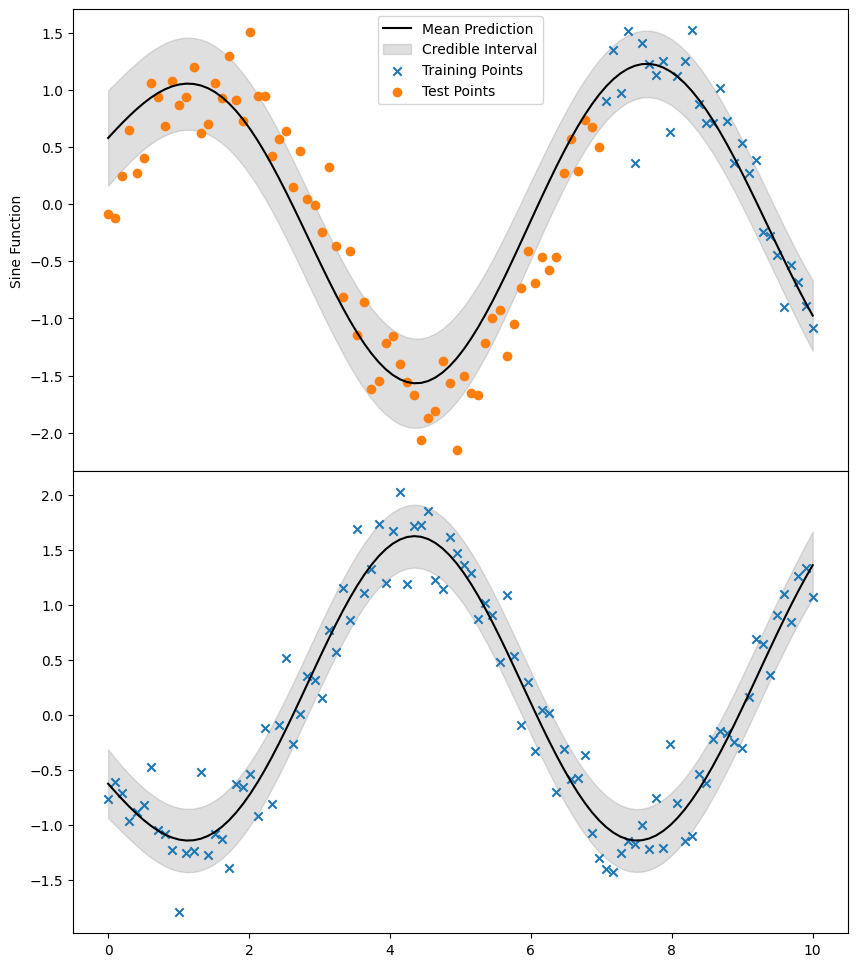

In [81]:
# Display model parameters
display(model['ICM0.B.W'], model['ICM0.B.kappa'])

fig = plt.figure(figsize=(10, 12))
gs = fig.add_gridspec(num_outputs, hspace=0)
axs = gs.subplots(sharex=True)

for i, X, Y in zip(range(num_outputs), X_list, Y_list):
    X_test_with_index = np.hstack((X1, (i * np.ones_like(X1)).reshape(-1,1)))
    Y_metadata = {'output_index': X_test_with_index[:, 1:].astype(int)}
    preds = model.predict(X_test_with_index, Y_metadata=Y_metadata)
    lower, upper = model.predict_quantiles(X=X_test_with_index, Y_metadata=Y_metadata, quantiles=(16, 84))
    lower, upper = lower.flatten(), upper.flatten()    

    if i == 0:
        axs[i].plot(X1, preds[0].flatten(), color='black', label='Mean Prediction')
        axs[i].fill_between(X1.flatten(), lower, upper, alpha=0.25, color='grey', label='Credible Interval')
        axs[i].scatter(X_train, Y_train, marker='x', label='Training Points')
        axs[i].scatter(X_test, Y_test, label='Test Points')
        axs[i].set_ylabel('Sine Function')
        axs[i].legend(loc='upper center')
    else:
        axs[i].plot(X, preds[0].flatten(), color='black')
        axs[i].fill_between(X.flatten(), lower, upper, alpha=0.25, color='grey')
        axs[i].scatter(X, Y, marker='x',)

plt.show()


## With Y2 and Y3

### Correlating with $Y2 = \sin(X)$ and $Y3 = \sin(X)$

In [82]:
# Generate mock datasets
np.random.seed(42)

# Dataset 1: Sine function with two peaks
X1 = np.linspace(0, 10, 100)[:, None]
Y1 = np.sin(X1) + 0.2 * np.random.randn(100, 1)


# Dataset 2: Double sinc function
X2 = np.linspace(0, 10, 100)[:, None]
Y2 = np.sin(X1) + 0.2 * np.random.randn(100, 1)

# Dataset 2: Double sinc function
X3 = np.linspace(0, 10, 100)[:, None]
Y3 = np.sin(X1) + 0.2 * np.random.randn(100, 1)

Y1 = normalize(Y1)
Y2 = normalize(Y2)
Y3 = normalize(Y3)

# Withhold the first peak of Dataset 1 for testing
lower = 0
upper = 7

X_train = X1[(X1 < lower) | (X1 > upper)].reshape(-1, 1)
Y_train = Y1[(X1 < lower) | (X1 > upper)].reshape(-1, 1)
X_test = X1[(X1 >= lower) & (X1 <= upper)].reshape(-1, 1)
Y_test = Y1[(X1 >= lower) & (X1 <= upper)].reshape(-1, 1)

# Define kernels
K1 = GPy.kern.Bias(1)  # Bias kernel
K2 = GPy.kern.RBF(1)   # RBF kernel
K3 = GPy.kern.White(1)   # RBF kernel
K4 = GPy.kern.Matern52(1)

X_list = [X_train, X2, X3]
Y_list = [Y_train, Y2, Y3]
K_list = [K2]
num_outputs = len(X_list)

# LCM kernel with three outputs
lcm = GPy.util.multioutput.LCM(input_dim=1, num_outputs=num_outputs, kernels_list=K_list)

# Create the GP coregionalized regression model
model = GPy.models.GPCoregionalizedRegression(X_list=X_list, Y_list=Y_list, kernel=lcm)

# Optimize the model
model.optimize()

index,gp.ICM0.B.W,constraints,priors
[0 0],-22.16846748,,
[1 0],-21.51988054,,
[2 0],-21.25504312,,


index,gp.ICM0.B.kappa,constraints,priors
[0],0.00000167,+ve,
[1],0.00000000,+ve,
[2],0.00000000,+ve,


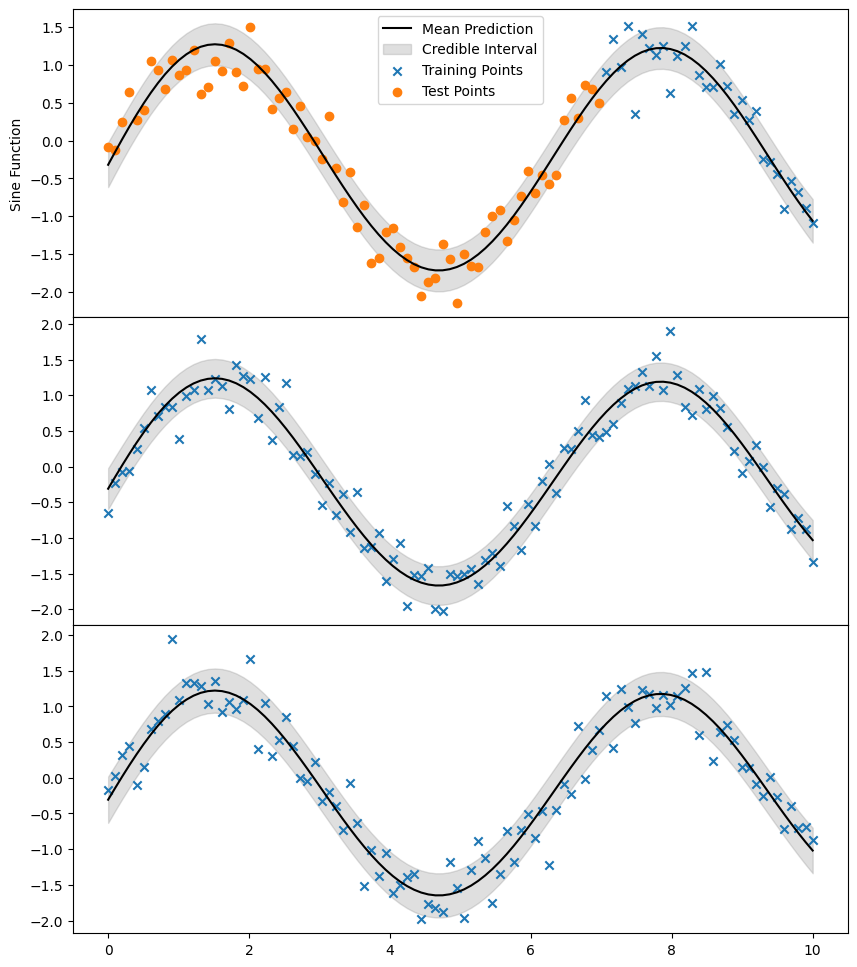

In [83]:
# Display model parameters
display(model['ICM0.B.W'], model['ICM0.B.kappa'])

fig = plt.figure(figsize=(10, 12))
gs = fig.add_gridspec(num_outputs, hspace=0)
axs = gs.subplots(sharex=True)

for i, X, Y in zip(range(num_outputs), X_list, Y_list):
    X_test_with_index = np.hstack((X1, (i * np.ones_like(X1)).reshape(-1,1)))
    Y_metadata = {'output_index': X_test_with_index[:, 1:].astype(int)}
    preds = model.predict(X_test_with_index, Y_metadata=Y_metadata)
    lower, upper = model.predict_quantiles(X=X_test_with_index, Y_metadata=Y_metadata, quantiles=(16, 84))
    lower, upper = lower.flatten(), upper.flatten()    

    if i == 0:
        axs[i].plot(X1, preds[0].flatten(), color='black', label='Mean Prediction')
        axs[i].fill_between(X1.flatten(), lower, upper, alpha=0.25, color='grey', label='Credible Interval')
        axs[i].scatter(X_train, Y_train, marker='x', label='Training Points')
        axs[i].scatter(X_test, Y_test, label='Test Points')
        axs[i].set_ylabel('Sine Function')
        axs[i].legend(loc='upper center')
    else:
        axs[i].plot(X, preds[0].flatten(), color='black')
        axs[i].fill_between(X.flatten(), lower, upper, alpha=0.25, color='grey')
        axs[i].scatter(X, Y, marker='x',)

plt.show()


### Correlating with $Y2 = \sin(X)$ and $Y3 = \sin(X + \pi/2)$

In [84]:
# Generate mock datasets
np.random.seed(42)

# Dataset 1: Sine function with two peaks
X1 = np.linspace(0, 10, 100)[:, None]
Y1 = np.sin(X1) + 0.2 * np.random.randn(100, 1)


# Dataset 2: Double sinc function
X2 = np.linspace(0, 10, 100)[:, None]
Y2 = np.sin(X1) + 0.2 * np.random.randn(100, 1)

# Dataset 2: Double sinc function
X3 = np.linspace(0, 10, 100)[:, None]
Y3 = np.sin(X1 + np.pi/2) + 0.2 * np.random.randn(100, 1)

Y1 = normalize(Y1)
Y2 = normalize(Y2)
Y3 = normalize(Y3)

# Withhold the first peak of Dataset 1 for testing
lower = 0
upper = 7

X_train = X1[(X1 < lower) | (X1 > upper)].reshape(-1, 1)
Y_train = Y1[(X1 < lower) | (X1 > upper)].reshape(-1, 1)
X_test = X1[(X1 >= lower) & (X1 <= upper)].reshape(-1, 1)
Y_test = Y1[(X1 >= lower) & (X1 <= upper)].reshape(-1, 1)

# Define kernels
K1 = GPy.kern.Bias(1)  # Bias kernel
K2 = GPy.kern.RBF(1)   # RBF kernel
K3 = GPy.kern.White(1)   # RBF kernel
K4 = GPy.kern.Matern52(1)

X_list = [X_train, X2, X3]
Y_list = [Y_train, Y2, Y3]
K_list = [K2]
num_outputs = len(X_list)

# LCM kernel with three outputs
lcm = GPy.util.multioutput.LCM(input_dim=1, num_outputs=num_outputs, kernels_list=K_list)

# Create the GP coregionalized regression model
model = GPy.models.GPCoregionalizedRegression(X_list=X_list, Y_list=Y_list, kernel=lcm)

# Optimize the model
model.optimize()

index,gp.ICM0.B.W,constraints,priors
[0 0],-4.97389157,,
[1 0],-4.98378203,,
[2 0],-0.02155902,,


index,gp.ICM0.B.kappa,constraints,priors
[0],0.00000015,+ve,
[1],0.00000028,+ve,
[2],18.71817233,+ve,


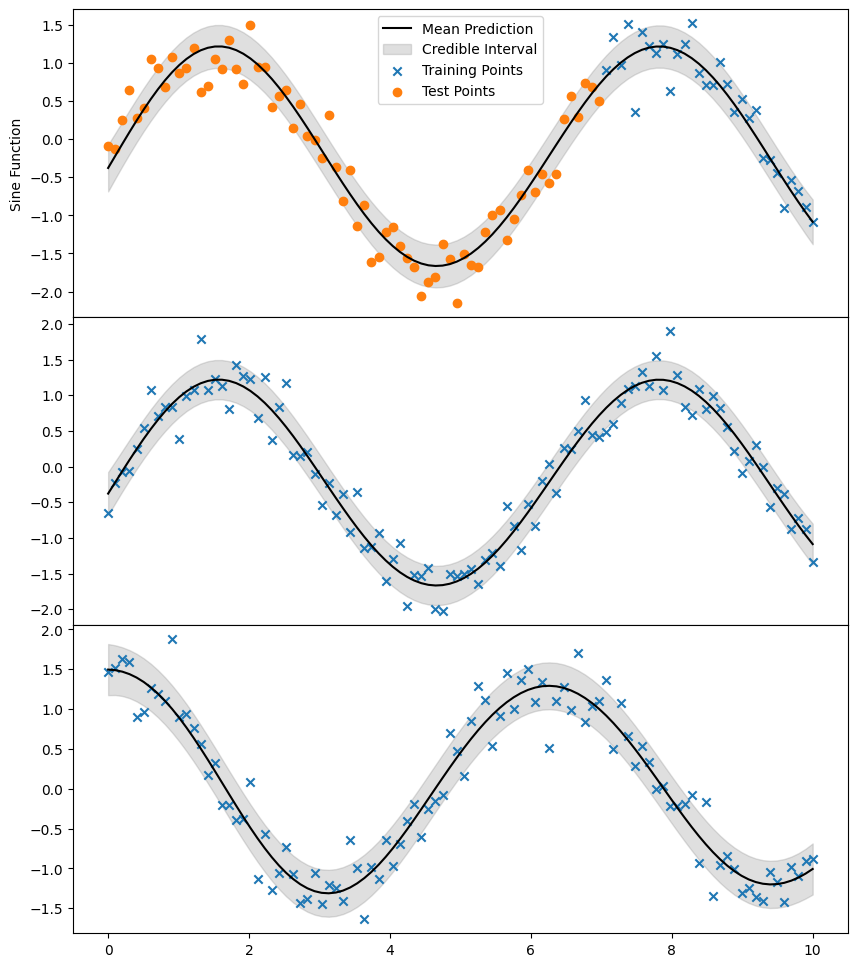

In [85]:
# Display model parameters
display(model['ICM0.B.W'], model['ICM0.B.kappa'])

fig = plt.figure(figsize=(10, 12))
gs = fig.add_gridspec(num_outputs, hspace=0)
axs = gs.subplots(sharex=True)

for i, X, Y in zip(range(num_outputs), X_list, Y_list):
    X_test_with_index = np.hstack((X1, (i * np.ones_like(X1)).reshape(-1,1)))
    Y_metadata = {'output_index': X_test_with_index[:, 1:].astype(int)}
    preds = model.predict(X_test_with_index, Y_metadata=Y_metadata)
    lower, upper = model.predict_quantiles(X=X_test_with_index, Y_metadata=Y_metadata, quantiles=(16, 84))
    lower, upper = lower.flatten(), upper.flatten()    

    if i == 0:
        axs[i].plot(X1, preds[0].flatten(), color='black', label='Mean Prediction')
        axs[i].fill_between(X1.flatten(), lower, upper, alpha=0.25, color='grey', label='Credible Interval')
        axs[i].scatter(X_train, Y_train, marker='x', label='Training Points')
        axs[i].scatter(X_test, Y_test, label='Test Points')
        axs[i].set_ylabel('Sine Function')
        axs[i].legend(loc='upper center')
    else:
        axs[i].plot(X, preds[0].flatten(), color='black')
        axs[i].fill_between(X.flatten(), lower, upper, alpha=0.25, color='grey')
        axs[i].scatter(X, Y, marker='x',)

plt.show()


### Correlating with $Y2 = \sin(X)$ and $Y3 = \sin(X + \pi)$

In [86]:
# Generate mock datasets
np.random.seed(42)

# Dataset 1: Sine function with two peaks
X1 = np.linspace(0, 10, 100)[:, None]
Y1 = np.sin(X1) + 0.2 * np.random.randn(100, 1)


# Dataset 2: Double sinc function
X2 = np.linspace(0, 10, 100)[:, None]
Y2 = np.sin(X1) + 0.2 * np.random.randn(100, 1)

# Dataset 2: Double sinc function
X3 = np.linspace(0, 10, 100)[:, None]
Y3 = np.sin(X1 + np.pi) + 0.2 * np.random.randn(100, 1)

Y1 = normalize(Y1)
Y2 = normalize(Y2)
Y3 = normalize(Y3)

# Withhold the first peak of Dataset 1 for testing
lower = 0
upper = 7

X_train = X1[(X1 < lower) | (X1 > upper)].reshape(-1, 1)
Y_train = Y1[(X1 < lower) | (X1 > upper)].reshape(-1, 1)
X_test = X1[(X1 >= lower) & (X1 <= upper)].reshape(-1, 1)
Y_test = Y1[(X1 >= lower) & (X1 <= upper)].reshape(-1, 1)

# Define kernels
K1 = GPy.kern.Bias(1)  # Bias kernel
K2 = GPy.kern.RBF(1)   # RBF kernel
K3 = GPy.kern.White(1)   # RBF kernel
K4 = GPy.kern.Matern52(1)

X_list = [X_train, X2, X3]
Y_list = [Y_train, Y2, Y3]
K_list = [K2]
num_outputs = len(X_list)

# LCM kernel with three outputs
lcm = GPy.util.multioutput.LCM(input_dim=1, num_outputs=num_outputs, kernels_list=K_list)

# Create the GP coregionalized regression model
model = GPy.models.GPCoregionalizedRegression(X_list=X_list, Y_list=Y_list, kernel=lcm)

# Optimize the model
model.optimize()

index,gp.ICM0.B.W,constraints,priors
[0 0],-22.04200613,,
[1 0],-22.19906047,,
[2 0],21.90842735,,


index,gp.ICM0.B.kappa,constraints,priors
[0],0.00000156,+ve,
[1],0.00000000,+ve,
[2],0.00000000,+ve,


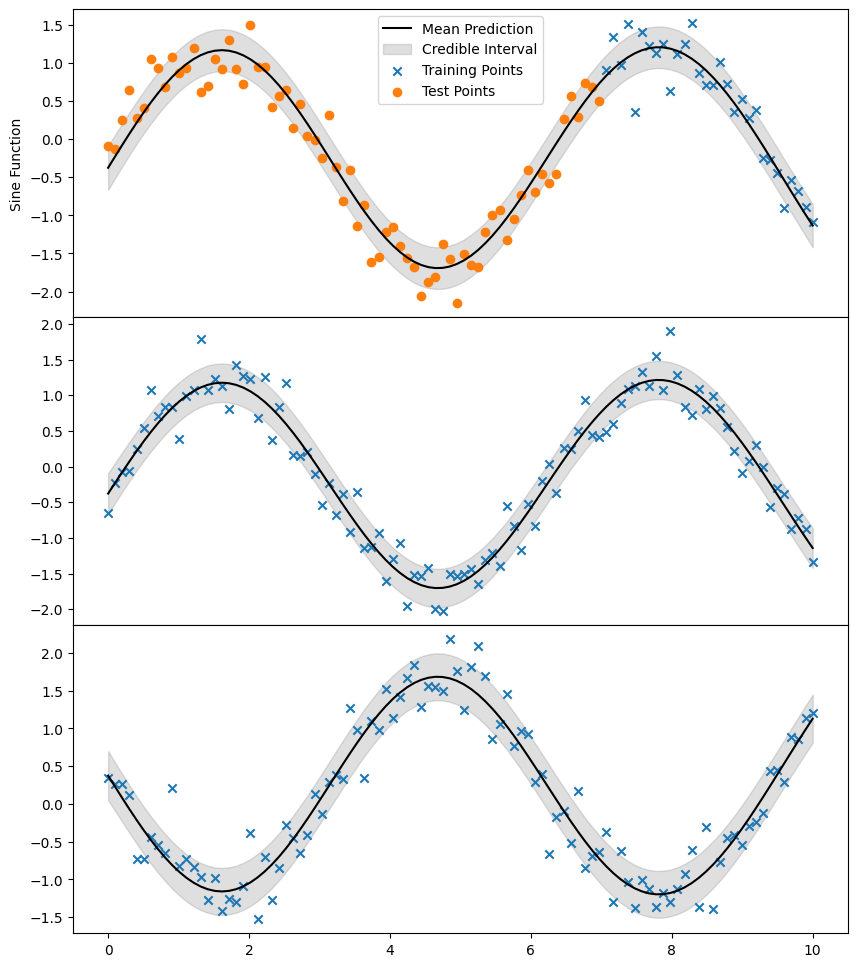

In [87]:
# Display model parameters
display(model['ICM0.B.W'], model['ICM0.B.kappa'])

fig = plt.figure(figsize=(10, 12))
gs = fig.add_gridspec(num_outputs, hspace=0)
axs = gs.subplots(sharex=True)

for i, X, Y in zip(range(num_outputs), X_list, Y_list):
    X_test_with_index = np.hstack((X1, (i * np.ones_like(X1)).reshape(-1,1)))
    Y_metadata = {'output_index': X_test_with_index[:, 1:].astype(int)}
    preds = model.predict(X_test_with_index, Y_metadata=Y_metadata)
    lower, upper = model.predict_quantiles(X=X_test_with_index, Y_metadata=Y_metadata, quantiles=(16, 84))
    lower, upper = lower.flatten(), upper.flatten()    

    if i == 0:
        axs[i].plot(X1, preds[0].flatten(), color='black', label='Mean Prediction')
        axs[i].fill_between(X1.flatten(), lower, upper, alpha=0.25, color='grey', label='Credible Interval')
        axs[i].scatter(X_train, Y_train, marker='x', label='Training Points')
        axs[i].scatter(X_test, Y_test, label='Test Points')
        axs[i].set_ylabel('Sine Function')
        axs[i].legend(loc='upper center')
    else:
        axs[i].plot(X, preds[0].flatten(), color='black')
        axs[i].fill_between(X.flatten(), lower, upper, alpha=0.25, color='grey')
        axs[i].scatter(X, Y, marker='x',)

plt.show()


### Correlating with $Y2 = \sin(X - \pi/2)$ and $Y3 = \sin(X + \pi/2)$

In [98]:
# Generate mock datasets
np.random.seed(42)

# Dataset 1: Sine function with two peaks
X1 = np.linspace(0, 10, 100)[:, None]
Y1 = np.sin(X1) + 0.2 * np.random.randn(100, 1)


# Dataset 2: Double sinc function
X2 = np.linspace(0, 10, 100)[:, None]
Y2 = np.sin(X1 - np.pi/2) + 0.2 * np.random.randn(100, 1)

# Dataset 2: Double sinc function
X3 = np.linspace(0, 10, 100)[:, None]
Y3 = np.sin(X1 + np.pi/2) + 0.2 * np.random.randn(100, 1)

Y1 = normalize(Y1)
Y2 = normalize(Y2)
Y3 = normalize(Y3)

# Withhold the first peak of Dataset 1 for testing
lower = 0
upper = 7

X_train = X1[(X1 < lower) | (X1 > upper)].reshape(-1, 1)
Y_train = Y1[(X1 < lower) | (X1 > upper)].reshape(-1, 1)
X_test = X1[(X1 >= lower) & (X1 <= upper)].reshape(-1, 1)
Y_test = Y1[(X1 >= lower) & (X1 <= upper)].reshape(-1, 1)

# Define kernels
K1 = GPy.kern.Bias(1)  # Bias kernel
K2 = GPy.kern.RBF(1)   # RBF kernel
K3 = GPy.kern.White(1)   # RBF kernel
K4 = GPy.kern.Matern52(1)

X_list = [X_train, X2, X3]
Y_list = [Y_train, Y2, Y3]
K_list = [K2]
num_outputs = len(X_list)

# LCM kernel with three outputs
lcm = GPy.util.multioutput.LCM(input_dim=1, num_outputs=num_outputs, kernels_list=K_list)

# Create the GP coregionalized regression model
model = GPy.models.GPCoregionalizedRegression(X_list=X_list, Y_list=Y_list, kernel=lcm)

# Optimize the model
model.optimize()

index,gp.ICM0.B.W,constraints,priors
[0 0],-1.05909322,,
[1 0],-4.00043270,,
[2 0],3.97233431,,


index,gp.ICM0.B.kappa,constraints,priors
[0],20.06059938,+ve,
[1],0.00000002,+ve,
[2],0.00000003,+ve,


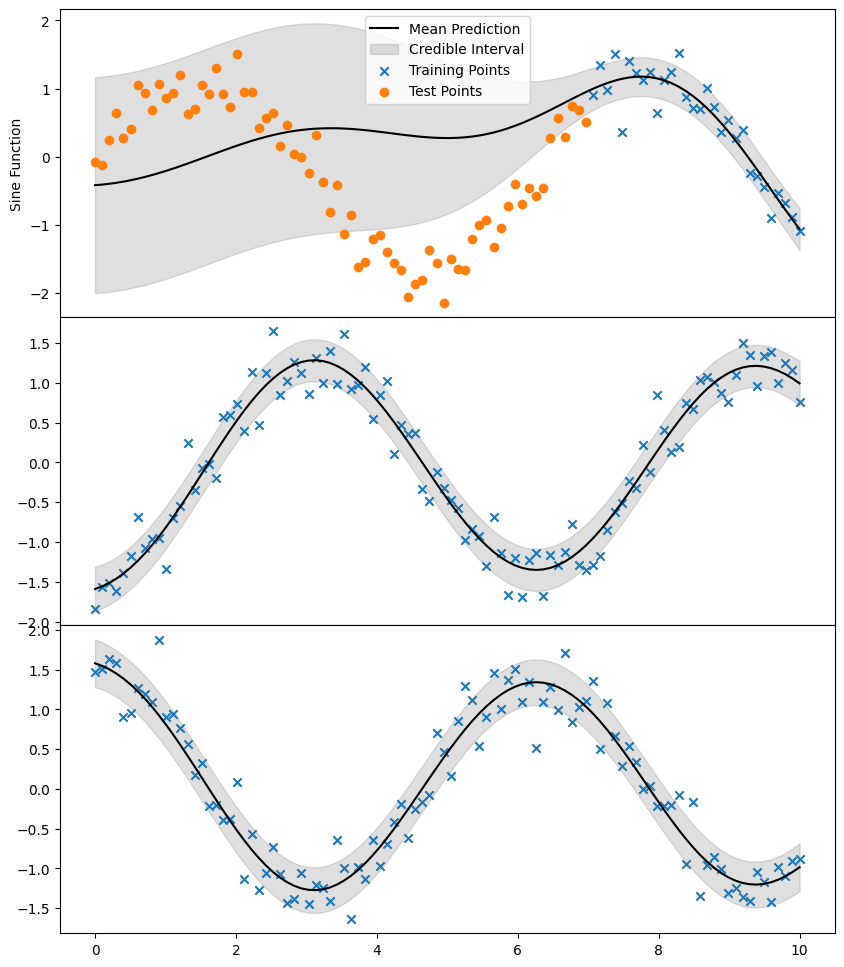

In [99]:
# Display model parameters
display(model['ICM0.B.W'], model['ICM0.B.kappa'])

fig = plt.figure(figsize=(10, 12))
gs = fig.add_gridspec(num_outputs, hspace=0)
axs = gs.subplots(sharex=True)

for i, X, Y in zip(range(num_outputs), X_list, Y_list):
    X_test_with_index = np.hstack((X1, (i * np.ones_like(X1)).reshape(-1,1)))
    Y_metadata = {'output_index': X_test_with_index[:, 1:].astype(int)}
    preds = model.predict(X_test_with_index, Y_metadata=Y_metadata)
    lower, upper = model.predict_quantiles(X=X_test_with_index, Y_metadata=Y_metadata, quantiles=(16, 84))
    lower, upper = lower.flatten(), upper.flatten()    

    if i == 0:
        axs[i].plot(X1, preds[0].flatten(), color='black', label='Mean Prediction')
        axs[i].fill_between(X1.flatten(), lower, upper, alpha=0.25, color='grey', label='Credible Interval')
        axs[i].scatter(X_train, Y_train, marker='x', label='Training Points')
        axs[i].scatter(X_test, Y_test, label='Test Points')
        axs[i].set_ylabel('Sine Function')
        axs[i].legend(loc='upper center')
    else:
        axs[i].plot(X, preds[0].flatten(), color='black')
        axs[i].fill_between(X.flatten(), lower, upper, alpha=0.25, color='grey')
        axs[i].scatter(X, Y, marker='x',)

plt.show()


### Correlating with $Y2 = \sin(X)$ and $Y3 = \mathcal{N}(0|1)$

In [100]:
# Generate mock datasets
np.random.seed(42)

# Dataset 1: Sine function with two peaks
X1 = np.linspace(0, 10, 100)[:, None]
Y1 = np.sin(X1) + 0.2 * np.random.randn(100, 1)


# Dataset 2: Double sinc function
X2 = np.linspace(0, 10, 100)[:, None]
Y2 = np.sin(X1) + 0.2 * np.random.randn(100, 1)

# Dataset 2: Double sinc function
X3 = np.linspace(0, 10, 100)[:, None]
Y3 = 0.2 * np.random.randn(100, 1)

Y1 = normalize(Y1)
Y2 = normalize(Y2)
Y3 = normalize(Y3)

# Withhold the first peak of Dataset 1 for testing
lower = 0
upper = 7

X_train = X1[(X1 < lower) | (X1 > upper)].reshape(-1, 1)
Y_train = Y1[(X1 < lower) | (X1 > upper)].reshape(-1, 1)
X_test = X1[(X1 >= lower) & (X1 <= upper)].reshape(-1, 1)
Y_test = Y1[(X1 >= lower) & (X1 <= upper)].reshape(-1, 1)

# Define kernels
K1 = GPy.kern.Bias(1)  # Bias kernel
K2 = GPy.kern.RBF(1)   # RBF kernel
K3 = GPy.kern.White(1)   # RBF kernel
K4 = GPy.kern.Matern52(1)

X_list = [X_train, X2, X3]
Y_list = [Y_train, Y2, Y3]
K_list = [K2]
num_outputs = len(X_list)

# LCM kernel with three outputs
lcm = GPy.util.multioutput.LCM(input_dim=1, num_outputs=num_outputs, kernels_list=K_list)

# Create the GP coregionalized regression model
model = GPy.models.GPCoregionalizedRegression(X_list=X_list, Y_list=Y_list, kernel=lcm)

# Optimize the model
model.optimize()

index,gp.ICM0.B.W,constraints,priors
[0 0],-19.09402190,,
[1 0],-19.08686960,,
[2 0],-0.44101157,,


index,gp.ICM0.B.kappa,constraints,priors
[0],0.00001244,+ve,
[1],0.00001399,+ve,
[2],0.00000000,+ve,


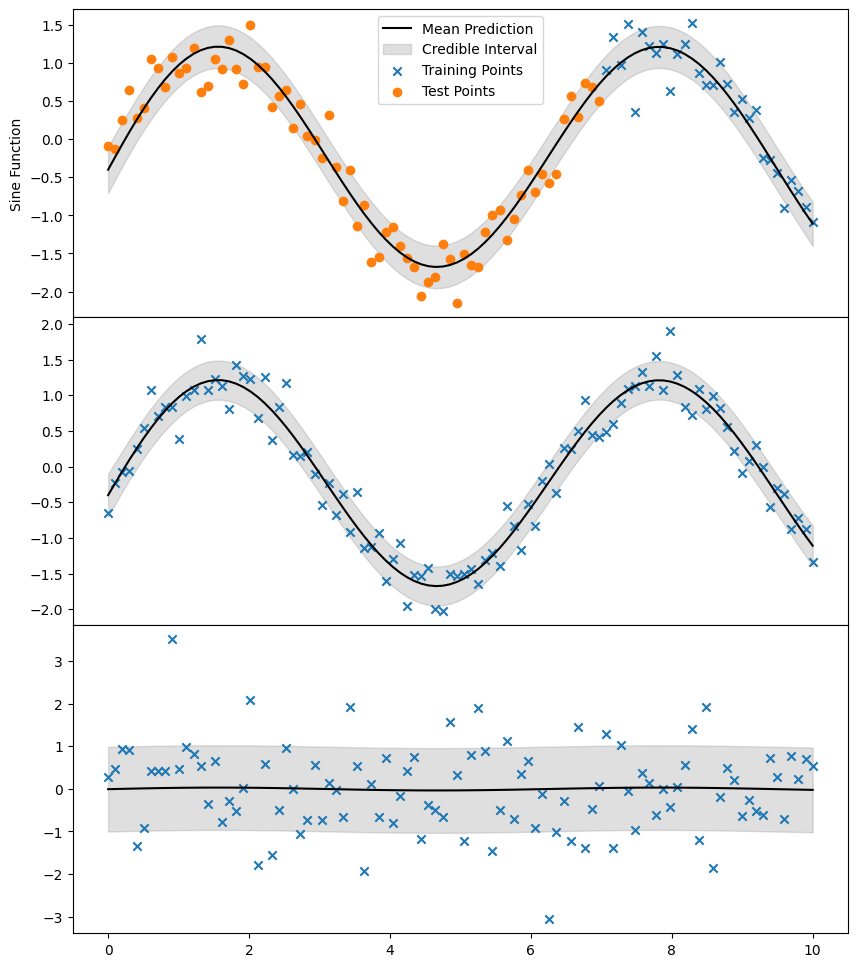

In [101]:
# Display model parameters
display(model['ICM0.B.W'], model['ICM0.B.kappa'])

fig = plt.figure(figsize=(10, 12))
gs = fig.add_gridspec(num_outputs, hspace=0)
axs = gs.subplots(sharex=True)

for i, X, Y in zip(range(num_outputs), X_list, Y_list):
    X_test_with_index = np.hstack((X1, (i * np.ones_like(X1)).reshape(-1,1)))
    Y_metadata = {'output_index': X_test_with_index[:, 1:].astype(int)}
    preds = model.predict(X_test_with_index, Y_metadata=Y_metadata)
    lower, upper = model.predict_quantiles(X=X_test_with_index, Y_metadata=Y_metadata, quantiles=(16, 84))
    lower, upper = lower.flatten(), upper.flatten()    

    if i == 0:
        axs[i].plot(X1, preds[0].flatten(), color='black', label='Mean Prediction')
        axs[i].fill_between(X1.flatten(), lower, upper, alpha=0.25, color='grey', label='Credible Interval')
        axs[i].scatter(X_train, Y_train, marker='x', label='Training Points')
        axs[i].scatter(X_test, Y_test, label='Test Points')
        axs[i].set_ylabel('Sine Function')
        axs[i].legend(loc='upper center')
    else:
        axs[i].plot(X, preds[0].flatten(), color='black')
        axs[i].fill_between(X.flatten(), lower, upper, alpha=0.25, color='grey')
        axs[i].scatter(X, Y, marker='x',)

plt.show()


In [113]:
import numpy as np
import matplotlib.pyplot as plt
import GPy

# Generate mock datasets
np.random.seed(42)

# Dataset 1: Sine function with two peaks
X1 = np.linspace(0, 10, 100)[:, None]
period = 4.0  # Adjust the period to control the distance between peaks
omega = 2 * np.pi / period
Y1 = np.sin(omega * X1 + np.pi) + 0.2 * np.random.randn(100, 1)


# Dataset 2: Double sinc function
X2 = np.linspace(0, 10, 100)[:, None]
Y2 = sinc(X2 - 3) + sinc(X2 - 7) + 0.1 * np.random.randn(100, 1)

# Dataset 3: Gaussian function with two peaks
X3 = np.linspace(0, 10, 100)[:, None]
Y3 = np.exp(-0.5 * ((X3 - 3) ** 2) / 0.5) + np.exp(-0.5 * ((X3 - 7) ** 2) / 0.5) + 0.1 * np.random.randn(100, 1)


# Normalize datasets
def normalize(Y):
    Y_mean = Y.mean()
    Y_std = Y.std()
    return (Y - Y_mean) / Y_std

Y1 = normalize(Y1)
Y2 = normalize(Y2)
Y3 = normalize(Y3)

# Withhold the first peak of Dataset 1 for testing
lower = 0
upper = 3

X_train = X1[(X1 < lower) | (X1 > upper)].reshape(-1, 1)
Y_train = Y1[(X1 < lower) | (X1 > upper)].reshape(-1, 1)
X_test = X1[(X1 >= lower) & (X1 <= upper)].reshape(-1, 1)
Y_test = Y1[(X1 >= lower) & (X1 <= upper)].reshape(-1, 1)

# Define kernels
K1 = GPy.kern.Bias(1)  # Bias kernel
K2 = GPy.kern.RBF(1)   # RBF kernel
K3 = GPy.kern.White(1)   # RBF kernel
K4 = GPy.kern.Matern52(1)

X_list = [X_train, X2, X3]
Y_list = [Y_train, Y2, Y3]
K_list = [K2]
num_outputs = len(X_list)

# LCM kernel with three outputs
lcm = GPy.util.multioutput.LCM(input_dim=1, num_outputs=num_outputs, kernels_list=K_list)

# Create the GP coregionalized regression model
model = GPy.models.GPCoregionalizedRegression(X_list=X_list, Y_list=Y_list, kernel=lcm)

# Optimize the model
model.optimize()


index,gp.ICM0.B.W,constraints,priors
[0 0],-2.54721677,,
[1 0],-2.81168475,,
[2 0],-2.65844860,,


index,gp.ICM0.B.kappa,constraints,priors
[0],0.68373174,+ve,
[1],5.42687026,+ve,
[2],0.00000198,+ve,


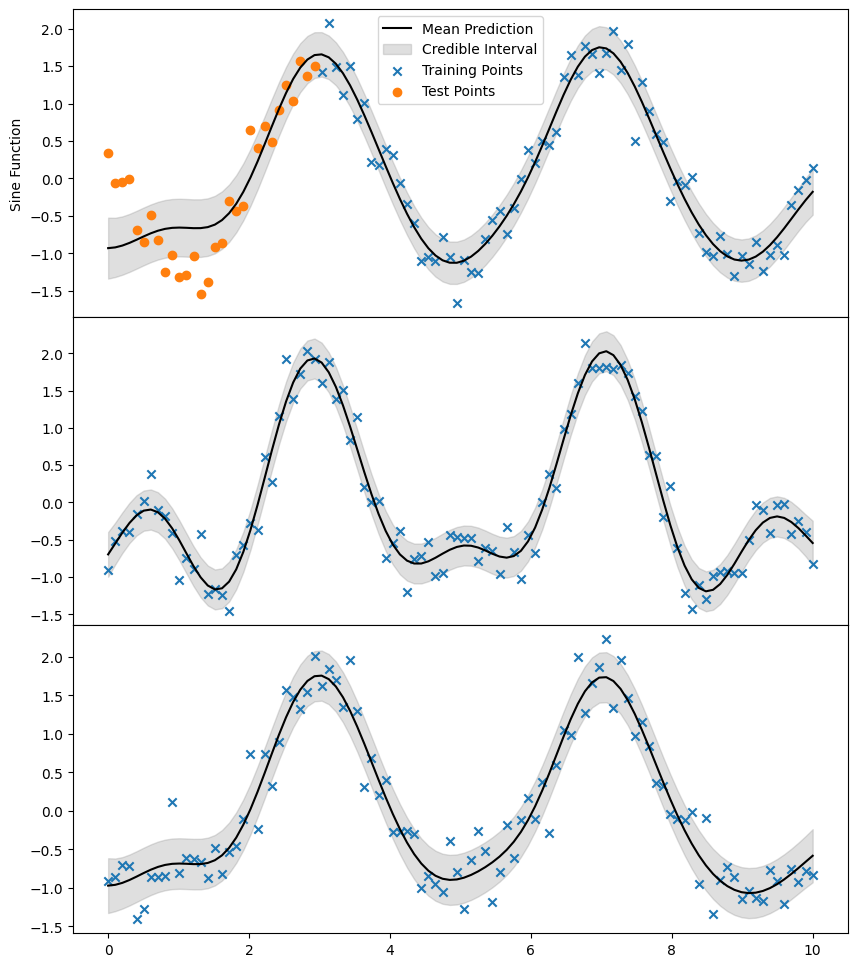

In [114]:
# Display model parameters
display(model['ICM0.B.W'], model['ICM0.B.kappa'])

fig = plt.figure(figsize=(10, 12))
gs = fig.add_gridspec(num_outputs, hspace=0)
axs = gs.subplots(sharex=True)

for i, X, Y in zip(range(num_outputs), X_list, Y_list):
    X_test_with_index = np.hstack((X1, (i * np.ones_like(X1)).reshape(-1,1)))
    Y_metadata = {'output_index': X_test_with_index[:, 1:].astype(int)}
    preds = model.predict(X_test_with_index, Y_metadata=Y_metadata)
    lower, upper = model.predict_quantiles(X=X_test_with_index, Y_metadata=Y_metadata, quantiles=(16, 84))
    lower, upper = lower.flatten(), upper.flatten()    

    if i == 0:
        axs[i].plot(X1, preds[0].flatten(), color='black', label='Mean Prediction')
        axs[i].fill_between(X1.flatten(), lower, upper, alpha=0.25, color='grey', label='Credible Interval')
        axs[i].scatter(X_train, Y_train, marker='x', label='Training Points')
        axs[i].scatter(X_test, Y_test, label='Test Points')
        axs[i].set_ylabel('Sine Function')
        axs[i].legend(loc='upper center')
    else:
        axs[i].plot(X, preds[0].flatten(), color='black')
        axs[i].fill_between(X.flatten(), lower, upper, alpha=0.25, color='grey')
        axs[i].scatter(X, Y, marker='x',)

plt.show()
